# Custom training: basic
* [source site](https://www.tensorflow.org/beta/tutorials/eager/custom_training)

In [1]:
import tensorflow as tf

In [2]:
x = tf.zeros((10,10))

In [3]:
print(x)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)


In [4]:
x += 2
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [5]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

In [6]:
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>


In [8]:
v.assign(3.0)
assert v.numpy() == 3.0

In [9]:
v.assign(tf.square(v))
assert v.numpy() == 9.0

In [10]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    def __call__(self, x):
        return self.W * x + self.b
    
model = Model()

assert model(3.0).numpy() == 15.0

In [11]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [12]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

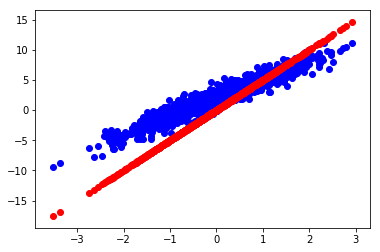

In [14]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

In [15]:
print('Current loss: '),
print(loss(model(inputs), outputs).numpy())

Current loss: 
9.036991


In [16]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [25]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)

    train(model, inputs, outputs, learning_rate=0.2)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
         (epoch, Ws[-1], bs[-1], current_loss))


Epoch  0: W=5.00 b=0.00, loss=9.03699
Epoch  1: W=4.18 b=0.80, loss=3.79650
Epoch  2: W=3.70 b=1.29, loss=1.94963
Epoch  3: W=3.42 b=1.58, loss=1.29820
Epoch  4: W=3.26 b=1.76, loss=1.06822
Epoch  5: W=3.16 b=1.86, loss=0.98697
Epoch  6: W=3.11 b=1.93, loss=0.95824
Epoch  7: W=3.08 b=1.96, loss=0.94807
Epoch  8: W=3.06 b=1.99, loss=0.94447
Epoch  9: W=3.05 b=2.00, loss=0.94319


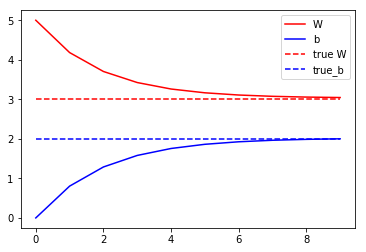

In [26]:
# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()